In [871]:
import pandas as pd
import numpy as np
import re
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


In [872]:
df = pd.read_csv('combined_output.csv', low_memory=False)

In [873]:
df.columns

Index(['name', 'id', 'publicationDate', 'isCreditAvailable', 'isNewAuto',
       'isTradeInAuto', 'photoCount', 'section', 'categoryString', 'category',
       'categoryId', 'availability', 'region', 'city', 'lastUpdate', 'status',
       'unitPrice', 'url', 'appliedPaidServices', 'video', 'seller_userId',
       'seller_userTypeId', 'attributes_model', 'attributes_brand',
       'attributes_avgPrice', 'parameters_Город', 'parameters_Поколение',
       'parameters_Кузов', 'parameters_Объем двигателя, л',
       'parameters_Коробка передач', 'parameters_Привод', 'parameters_Руль',
       'parameters_Цвет', 'parameters_Растаможен в Казахстане',
       'parameters_Пробег', 'parameters_Наличие', 'parameters_Двигатель',
       'source_file', 'new', 'add_date-desc', 'price-asc',
       'year.price-desc.asc', 'price-desc'],
      dtype='object')

In [874]:
df.head()

,name,id,publicationDate,isCreditAvailable,isNewAuto,isTradeInAuto,photoCount,section,categoryString,category,...,parameters_Растаможен в Казахстане,parameters_Пробег,parameters_Наличие,parameters_Двигатель,source_file,new,add_date-desc,price-asc,year.price-desc.asc,price-desc
0,Mercedes-Benz S 500 2008 г.,182258672.0,2025-02-18T23:59:59+05:00,True,False,False,10.0,auto,auto.car,auto,...,Да,NaN,NaN,NaN,cars_add_date-desc_2025-02-18_10-36-47.json,NaN,NaN,NaN,NaN,NaN
1,Mercedes-Benz S 500 2008 г.,182258672.0,2025-02-18T23:59:59+05:00,True,False,False,10.0,auto,auto.car,auto.car,...,Да,NaN,NaN,NaN,cars_add_date-desc_2025-02-18_10-36-47.json,NaN,NaN,NaN,NaN,NaN
2,Chevrolet Spark 2022 г.,180886528.0,2025-02-18T23:59:59+05:00,True,False,False,15.0,auto,auto.car,auto,...,Да,74 564 км,NaN,NaN,cars_add_date-desc_2025-02-18_10-36-47.json,NaN,NaN,NaN,NaN,NaN
3,Chevrolet Spark 2022 г.,180886528.0,2025-02-18T23:59:59+05:00,True,False,False,15.0,auto,auto.car,auto,...,Да,74 564 км,NaN,NaN,cars_add_date-desc_2025-02-18_10-36-47.json,NaN,NaN,NaN,NaN,NaN
4,Chevrolet Spark 2022 г.,180886528.0,2025-02-18T23:59:59+05:00,True,False,False,15.0,auto,auto.car,auto,...,Да,74 564 км,NaN,NaN,cars_add_date-desc_2025-02-18_10-36-47.json,NaN,NaN,NaN,NaN,NaN


In [875]:
cols = df.columns

In [876]:
for i in cols:
    print('\'' + i + '\'')

'name'
'id'
'publicationDate'
'isCreditAvailable'
'isNewAuto'
'isTradeInAuto'
'photoCount'
'section'
'categoryString'
'category'
'categoryId'
'availability'
'region'
'city'
'lastUpdate'
'status'
'unitPrice'
'url'
'appliedPaidServices'
'video'
'seller_userId'
'seller_userTypeId'
'attributes_model'
'attributes_brand'
'attributes_avgPrice'
'parameters_Город'
'parameters_Поколение'
'parameters_Кузов'
'parameters_Объем двигателя, л'
'parameters_Коробка передач'
'parameters_Привод'
'parameters_Руль'
'parameters_Цвет'
'parameters_Растаможен в Казахстане'
'parameters_Пробег'
'parameters_Наличие'
'parameters_Двигатель'
'source_file'
'new'
'add_date-desc'
'price-asc'
'year.price-desc.asc'
'price-desc'


In [877]:
columns_to_drop = ['publicationDate', 'isTradeInAuto', 'photoCount', 'categoryString','category', 'lastUpdate', 'source_file', 'add_date-desc',
                  'price-asc', 'year.price-desc.asc', 'price-desc', 'seller_userTypeId', 'seller_userId', 'video', 'appliedPaidServices', 'new',  'status',
                  'availability','url', 'section', 'id', 'parameters_Город', 'parameters_Цвет', 'parameters_Наличие', 'parameters_Поколение',
                  'city', 'region', 'categoryId', 'isCreditAvailable', 'attributes_avgPrice']

In [878]:
df_new = df.drop(columns=columns_to_drop, axis=1).copy()

In [879]:


print(df_new)

                                 name isNewAuto    unitPrice attributes_model  \
0         Mercedes-Benz S 500 2008 г.     False    8500000.0            S 500   
1         Mercedes-Benz S 500 2008 г.     False    8500000.0            S 500   
2             Chevrolet Spark 2022 г.     False    5050000.0            Spark   
3             Chevrolet Spark 2022 г.     False    5050000.0            Spark   
4             Chevrolet Spark 2022 г.     False    5050000.0            Spark   
...                               ...       ...          ...              ...   
84194  Mercedes-Benz G 63 AMG 2025 г.     False  154000000.0         G 63 AMG   
84195  Mercedes-Benz G 63 AMG 2025 г.     False  154000000.0         G 63 AMG   
84196  Mercedes-Benz G 63 AMG 2025 г.     False  212000000.0         G 63 AMG   
84197  Mercedes-Benz G 63 AMG 2025 г.     False  212000000.0         G 63 AMG   
84198                             NaN       NaN          NaN              NaN   

      attributes_brand para

In [880]:
df_new.head()

,name,isNewAuto,unitPrice,attributes_model,attributes_brand,parameters_Кузов,"parameters_Объем двигателя, л",parameters_Коробка передач,parameters_Привод,parameters_Руль,parameters_Растаможен в Казахстане,parameters_Пробег,parameters_Двигатель
0,Mercedes-Benz S 500 2008 г.,False,8500000.0,S 500,Mercedes-Benz,Седан,5.5 (бензин),Автомат,Задний привод,Слева,Да,NaN,NaN
1,Mercedes-Benz S 500 2008 г.,False,8500000.0,S 500,Mercedes-Benz,Седан,5.5 (бензин),Автомат,Задний привод,Слева,Да,NaN,NaN
2,Chevrolet Spark 2022 г.,False,5050000.0,Spark,Chevrolet,Хэтчбек,1.2 (бензин),Автомат,Передний привод,Слева,Да,74 564 км,NaN
3,Chevrolet Spark 2022 г.,False,5050000.0,Spark,Chevrolet,Хэтчбек,1.2 (бензин),Автомат,Передний привод,Слева,Да,74 564 км,NaN
4,Chevrolet Spark 2022 г.,False,5050000.0,Spark,Chevrolet,Хэтчбек,1.2 (бензин),Автомат,Передний привод,Слева,Да,74 564 км,NaN


In [881]:
df_new.columns

Index(['name', 'isNewAuto', 'unitPrice', 'attributes_model',
       'attributes_brand', 'parameters_Кузов', 'parameters_Объем двигателя, л',
       'parameters_Коробка передач', 'parameters_Привод', 'parameters_Руль',
       'parameters_Растаможен в Казахстане', 'parameters_Пробег',
       'parameters_Двигатель'],
      dtype='object')

In [882]:
df_new.drop_duplicates(inplace=True)

In [883]:
df_new

,name,isNewAuto,unitPrice,attributes_model,attributes_brand,parameters_Кузов,"parameters_Объем двигателя, л",parameters_Коробка передач,parameters_Привод,parameters_Руль,parameters_Растаможен в Казахстане,parameters_Пробег,parameters_Двигатель
0,Mercedes-Benz S 500 2008 г.,False,8500000.0,S 500,Mercedes-Benz,Седан,5.5 (бензин),Автомат,Задний привод,Слева,Да,NaN,NaN
2,Chevrolet Spark 2022 г.,False,5050000.0,Spark,Chevrolet,Хэтчбек,1.2 (бензин),Автомат,Передний привод,Слева,Да,74 564 км,NaN
8,Toyota Alphard 2004 г.,False,7300000.0,Alphard,Toyota,Минивэн,2.4 (бензин),Автомат,Передний привод,Слева,Да,230 000 км,NaN
10,BMW 520 1992 г.,False,1450000.0,520,BMW,Седан,2 (бензин),Механика,Задний привод,Слева,Да,NaN,NaN
12,ВАЗ (Lada) Vesta SW Enjoy 2024 г.,True,8790000.0,Vesta SW,ВАЗ (Lada),Универсал,1.8 (бензин),Автомат,Передний привод,Слева,Да,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84144,Toyota Corolla 2008 г.,False,4800000.0,Corolla,Toyota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84150,ВАЗ (Lada) Granta 2190 2017 г.,False,3700000.0,Granta 2190 (седан),ВАЗ (Lada),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84166,Kia Cerato 2021 г.,False,10430000.0,Cerato,Kia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84180,Chevrolet Tracker 2023 г.,False,7690000.0,Tracker,Chevrolet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [884]:
pattern = r"\b(19|20)\d{2}\b"

In [885]:
df_new["year"] = pd.to_numeric(df_new["name"].fillna("").str.extract(f"({pattern})")[0], errors="coerce").astype("Int64")
df_new["name"] = df_new["name"].str.replace(r"\s\d{4}\s*г?\.", "", regex=True)
print(df_new)

                            name isNewAuto   unitPrice     attributes_model  \
0            Mercedes-Benz S 500     False   8500000.0                S 500   
2                Chevrolet Spark     False   5050000.0                Spark   
8                 Toyota Alphard     False   7300000.0              Alphard   
10                       BMW 520     False   1450000.0                  520   
12     ВАЗ (Lada) Vesta SW Enjoy      True   8790000.0             Vesta SW   
...                          ...       ...         ...                  ...   
84144             Toyota Corolla     False   4800000.0              Corolla   
84150     ВАЗ (Lada) Granta 2190     False   3700000.0  Granta 2190 (седан)   
84166                 Kia Cerato     False  10430000.0               Cerato   
84180          Chevrolet Tracker     False   7690000.0              Tracker   
84198                        NaN       NaN         NaN                  NaN   

      attributes_brand parameters_Кузов parameters_

In [886]:
df_new

,name,isNewAuto,unitPrice,attributes_model,attributes_brand,parameters_Кузов,"parameters_Объем двигателя, л",parameters_Коробка передач,parameters_Привод,parameters_Руль,parameters_Растаможен в Казахстане,parameters_Пробег,parameters_Двигатель,year
0,Mercedes-Benz S 500,False,8500000.0,S 500,Mercedes-Benz,Седан,5.5 (бензин),Автомат,Задний привод,Слева,Да,NaN,NaN,2008
2,Chevrolet Spark,False,5050000.0,Spark,Chevrolet,Хэтчбек,1.2 (бензин),Автомат,Передний привод,Слева,Да,74 564 км,NaN,2022
8,Toyota Alphard,False,7300000.0,Alphard,Toyota,Минивэн,2.4 (бензин),Автомат,Передний привод,Слева,Да,230 000 км,NaN,2004
10,BMW 520,False,1450000.0,520,BMW,Седан,2 (бензин),Механика,Задний привод,Слева,Да,NaN,NaN,1992
12,ВАЗ (Lada) Vesta SW Enjoy,True,8790000.0,Vesta SW,ВАЗ (Lada),Универсал,1.8 (бензин),Автомат,Передний привод,Слева,Да,NaN,NaN,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84144,Toyota Corolla,False,4800000.0,Corolla,Toyota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008
84150,ВАЗ (Lada) Granta 2190,False,3700000.0,Granta 2190 (седан),ВАЗ (Lada),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
84166,Kia Cerato,False,10430000.0,Cerato,Kia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
84180,Chevrolet Tracker,False,7690000.0,Tracker,Chevrolet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023


In [887]:
df_new['mileage'] = pd.to_numeric(df_new["parameters_Пробег"].str.replace(r"\D+", "", regex=True), errors="coerce").astype("Int64")

In [888]:
df_new

,name,isNewAuto,unitPrice,attributes_model,attributes_brand,parameters_Кузов,"parameters_Объем двигателя, л",parameters_Коробка передач,parameters_Привод,parameters_Руль,parameters_Растаможен в Казахстане,parameters_Пробег,parameters_Двигатель,year,mileage
0,Mercedes-Benz S 500,False,8500000.0,S 500,Mercedes-Benz,Седан,5.5 (бензин),Автомат,Задний привод,Слева,Да,NaN,NaN,2008,<NA>
2,Chevrolet Spark,False,5050000.0,Spark,Chevrolet,Хэтчбек,1.2 (бензин),Автомат,Передний привод,Слева,Да,74 564 км,NaN,2022,74564
8,Toyota Alphard,False,7300000.0,Alphard,Toyota,Минивэн,2.4 (бензин),Автомат,Передний привод,Слева,Да,230 000 км,NaN,2004,230000
10,BMW 520,False,1450000.0,520,BMW,Седан,2 (бензин),Механика,Задний привод,Слева,Да,NaN,NaN,1992,<NA>
12,ВАЗ (Lada) Vesta SW Enjoy,True,8790000.0,Vesta SW,ВАЗ (Lada),Универсал,1.8 (бензин),Автомат,Передний привод,Слева,Да,NaN,NaN,2024,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84144,Toyota Corolla,False,4800000.0,Corolla,Toyota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008,<NA>
84150,ВАЗ (Lada) Granta 2190,False,3700000.0,Granta 2190 (седан),ВАЗ (Lada),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,<NA>
84166,Kia Cerato,False,10430000.0,Cerato,Kia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,<NA>
84180,Chevrolet Tracker,False,7690000.0,Tracker,Chevrolet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,<NA>


In [889]:
df_new.drop(columns=['parameters_Пробег'], axis=1, inplace=True)


In [890]:
avg_mileage = df_new.groupby('year')['mileage'].mean()

In [891]:
avg_mileage 

year
1955         125000.0
1958             <NA>
1962             <NA>
1963             <NA>
1965         111111.0
1975          55555.0
1982             <NA>
1983           1111.0
1984             <NA>
1985             <NA>
1986         321280.5
1987         500000.0
1988         133313.5
1989    320222.111111
1990    258050.074074
1991    280394.029412
1992        275916.68
1993    261595.723404
1994    297527.931034
1995    315615.981132
1996        270610.08
1997    329787.649351
1998    292509.666667
1999    260945.472727
2000    221077.869565
2001    238950.854167
2002     259194.15942
2003    281439.047619
2004    256014.537313
2005    257688.942857
2006    247940.837607
2007    218353.494186
2008    229052.941176
2009    216334.913043
2010    219906.412371
2011    197865.796748
2012    201824.512563
2013    191111.429508
2014    179383.029032
2015    165202.629032
2016    147143.298387
2017    134357.827068
2018    126812.782353
2019     105520.35443
2020     87575.369295
2021 

In [892]:
avg_mileage = avg_mileage.fillna(0)

In [893]:
avg_mileage

year
1955         125000.0
1958              0.0
1962              0.0
1963              0.0
1965         111111.0
1975          55555.0
1982              0.0
1983           1111.0
1984              0.0
1985              0.0
1986         321280.5
1987         500000.0
1988         133313.5
1989    320222.111111
1990    258050.074074
1991    280394.029412
1992        275916.68
1993    261595.723404
1994    297527.931034
1995    315615.981132
1996        270610.08
1997    329787.649351
1998    292509.666667
1999    260945.472727
2000    221077.869565
2001    238950.854167
2002     259194.15942
2003    281439.047619
2004    256014.537313
2005    257688.942857
2006    247940.837607
2007    218353.494186
2008    229052.941176
2009    216334.913043
2010    219906.412371
2011    197865.796748
2012    201824.512563
2013    191111.429508
2014    179383.029032
2015    165202.629032
2016    147143.298387
2017    134357.827068
2018    126812.782353
2019     105520.35443
2020     87575.369295
2021 

In [894]:
df_new['mileage'] = df_new['mileage'].astype('float64')

In [895]:
df_new = df_new.dropna(subset=['year'])

In [896]:
df_new['mileage'] = df_new.apply(
    lambda row: 0 if row['isNewAuto'] == 1 else (avg_mileage[row['year']] if pd.isna(row['mileage']) else row['mileage']), 
    axis=1
)

C:\Users\temir\AppData\Local\Temp\ipykernel_5672\2569646852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['mileage'] = df_new.apply(


In [897]:
# label_encoder_brand = LabelEncoder()
# label_encoder_model = LabelEncoder()

# # Кодируем
# df_new['attributes_brand'] = label_encoder_brand.fit_transform(df_new['attributes_brand'])
# df_new['attributes_model'] = label_encoder_model.fit_transform(df_new['attributes_model'])

# # Сохраняем соответствия для возможного обратного преобразования
# brand_mapping = dict(zip(label_encoder_brand.classes_, label_encoder_brand.transform(label_encoder_brand.classes_)))
# model_mapping = dict(zip(label_encoder_model.classes_, label_encoder_model.transform(label_encoder_model.classes_)))

In [898]:
df_new['attributes_brand']

0        Mercedes-Benz
2            Chevrolet
8               Toyota
10                 BMW
12          ВАЗ (Lada)
             ...      
84124    Mercedes-Benz
84144           Toyota
84150       ВАЗ (Lada)
84166              Kia
84180        Chevrolet
Name: attributes_brand, Length: 12676, dtype: object

In [899]:
df_new['mileage'].info()

<class 'pandas.core.series.Series'>
Index: 12676 entries, 0 to 84180
Series name: mileage
Non-Null Count  Dtype  
--------------  -----  
12676 non-null  float64
dtypes: float64(1)
memory usage: 198.1 KB


In [900]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12676 entries, 0 to 84180
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   name                                12676 non-null  object 
 1   isNewAuto                           12676 non-null  object 
 2   unitPrice                           12676 non-null  float64
 3   attributes_model                    12649 non-null  object 
 4   attributes_brand                    12676 non-null  object 
 5   parameters_Кузов                    6422 non-null   object 
 6   parameters_Объем двигателя, л       6324 non-null   object 
 7   parameters_Коробка передач          6422 non-null   object 
 8   parameters_Привод                   6422 non-null   object 
 9   parameters_Руль                     6422 non-null   object 
 10  parameters_Растаможен в Казахстане  6422 non-null   object 
 11  parameters_Двигатель                98 non-nul

In [901]:
df_new = df_new.dropna(subset=['attributes_model'])

In [902]:
df_new

,name,isNewAuto,unitPrice,attributes_model,attributes_brand,parameters_Кузов,"parameters_Объем двигателя, л",parameters_Коробка передач,parameters_Привод,parameters_Руль,parameters_Растаможен в Казахстане,parameters_Двигатель,year,mileage
0,Mercedes-Benz S 500,False,8500000.0,S 500,Mercedes-Benz,Седан,5.5 (бензин),Автомат,Задний привод,Слева,Да,NaN,2008,229052.941176
2,Chevrolet Spark,False,5050000.0,Spark,Chevrolet,Хэтчбек,1.2 (бензин),Автомат,Передний привод,Слева,Да,NaN,2022,74564.000000
8,Toyota Alphard,False,7300000.0,Alphard,Toyota,Минивэн,2.4 (бензин),Автомат,Передний привод,Слева,Да,NaN,2004,230000.000000
10,BMW 520,False,1450000.0,520,BMW,Седан,2 (бензин),Механика,Задний привод,Слева,Да,NaN,1992,275916.680000
12,ВАЗ (Lada) Vesta SW Enjoy,True,8790000.0,Vesta SW,ВАЗ (Lada),Универсал,1.8 (бензин),Автомат,Передний привод,Слева,Да,NaN,2024,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84124,Mercedes-Benz G 63 AMG,False,209500000.0,G 63 AMG,Mercedes-Benz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025,2238.812500
84144,Toyota Corolla,False,4800000.0,Corolla,Toyota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008,229052.941176
84150,ВАЗ (Lada) Granta 2190,False,3700000.0,Granta 2190 (седан),ВАЗ (Lada),NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,134357.827068
84166,Kia Cerato,False,10430000.0,Cerato,Kia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,72451.306494


In [903]:
encoder = LabelEncoder()
encodera = LabelEncoder()


df_new = df_new[df_new.duplicated(subset=['name'], keep=False)]


df_new["Car_encoded"] = encodera.fit_transform(df_new["name"])


C:\Users\temir\AppData\Local\Temp\ipykernel_5672\13146444.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Car_encoded"] = encodera.fit_transform(df_new["name"])


In [904]:
df_new["Car_encoded"] 

0        508
2        135
8        647
10        33
20       695
        ... 
84124    478
84144    663
84150    747
84166    332
84180    137
Name: Car_encoded, Length: 12228, dtype: int32

In [905]:
# df_new.drop(columns=['parameters_Кузов'], axis=1, inplace=True)

In [906]:
df_new['parameters_Кузов'] = df_new['parameters_Кузов'].fillna(df_new['parameters_Кузов'].mode().iloc[0])

C:\Users\temir\AppData\Local\Temp\ipykernel_5672\1669990850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['parameters_Кузов'] = df_new['parameters_Кузов'].fillna(df_new['parameters_Кузов'].mode().iloc[0])


In [907]:
df_new["Body_encoded"] = encoder.fit_transform(df_new["parameters_Кузов"])

C:\Users\temir\AppData\Local\Temp\ipykernel_5672\3831326267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Body_encoded"] = encoder.fit_transform(df_new["parameters_Кузов"])


In [908]:
# df_new.drop(columns=['parameters_Кузов'], axis=1, inplace=True)

In [909]:
df_new['parameters_Растаможен в Казахстане']

0         Да
2         Да
8         Да
10        Да
20        Да
        ... 
84124    NaN
84144    NaN
84150    NaN
84166    NaN
84180    NaN
Name: parameters_Растаможен в Казахстане, Length: 12228, dtype: object

In [910]:
df_new['parameters_Растаможен в Казахстане'] = df_new['parameters_Растаможен в Казахстане'].apply(
    lambda x: 1 if x == 'Да' else 0
)

C:\Users\temir\AppData\Local\Temp\ipykernel_5672\2970895296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['parameters_Растаможен в Казахстане'] = df_new['parameters_Растаможен в Казахстане'].apply(


In [911]:
df_new['parameters_Растаможен в Казахстане'].info()

<class 'pandas.core.series.Series'>
Index: 12228 entries, 0 to 84180
Series name: parameters_Растаможен в Казахстане
Non-Null Count  Dtype
--------------  -----
12228 non-null  int64
dtypes: int64(1)
memory usage: 191.1 KB


In [912]:
df_new['parameters_Объем двигателя, л'].unique()

array(['5.5 (бензин)', '1.2 (бензин)', '2.4 (бензин)', '2 (бензин)',
       '1.6 (бензин)', '2.5 (бензин)', '3 (бензин)', '3.6 (бензин)',
       '2.3 (бензин)', '6 (бензин)', '3 (дизель)', '2.9 (газ-бензин)',
       '3.5 (бензин)', '2.5 (дизель)', '1.5 (бензин)', '3.9 (бензин)',
       '2.4 (газ-бензин)', '1.3 (бензин)', '1.8 (бензин)', '1.4 (бензин)',
       '4.4 (бензин)', '4 (бензин)', '3.2 (бензин)', '5.7 (бензин)', nan,
       '1.5 (гибрид)', '4.8 (бензин)', '5.7 (газ-бензин)', '0.8 (бензин)',
       '5.4 (бензин)', '2.7 (бензин)', '5 (бензин)', '4.7 (бензин)',
       '3 (газ)', '4.6 (бензин)', '4.3 (бензин)', '4.2 (дизель)',
       '2.5 (газ-бензин)', '2.5 (гибрид)', '1 (бензин)', '3.8 (бензин)',
       '2.2 (дизель)', '2.2 (бензин)', '2.6 (бензин)', '4.5 (бензин)',
       '2.8 (бензин)', '1.7 (бензин)', '4 (гибрид)', '2.7 (газ-бензин)',
       '5.6 (бензин)', '2.8 (дизель)', '4.3 (газ-бензин)', '3.5 (гибрид)',
       '2.3 (дизель)', '6.2 (бензин)', '4 (газ-бензин)', '2.4 (дизель

In [913]:
df_new[['engine_volume', 'fuel_type']] = df_new['parameters_Объем двигателя, л'].str.extract(r'(\d+\.\d+|\d+) \((.*?)\)')
df_new['engine_volume'] = df_new['engine_volume'].astype(float)

C:\Users\temir\AppData\Local\Temp\ipykernel_5672\3756744192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[['engine_volume', 'fuel_type']] = df_new['parameters_Объем двигателя, л'].str.extract(r'(\d+\.\d+|\d+) \((.*?)\)')
C:\Users\temir\AppData\Local\Temp\ipykernel_5672\3756744192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[['engine_volume', 'fuel_type']] = df_new['parameters_Объем двигателя, л'].str.extract(r'(\d+\.\d+|\d+) \((.*?)\)')
C:\Users\temir\AppData\Local\Temp\ipykernel_

In [914]:
df_new['parameters_Двигатель'].unique()

array([nan, 'Электрический'], dtype=object)

In [915]:
df_new['fuel_type'] = df_new['fuel_type'].fillna(df_new['parameters_Двигатель'])
df_new.drop(columns=['parameters_Двигатель'], inplace=True)

C:\Users\temir\AppData\Local\Temp\ipykernel_5672\2692861541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['fuel_type'] = df_new['fuel_type'].fillna(df_new['parameters_Двигатель'])
C:\Users\temir\AppData\Local\Temp\ipykernel_5672\2692861541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(columns=['parameters_Двигатель'], inplace=True)


In [916]:
df_new['fuel_type'].unique()


array(['бензин', 'дизель', 'газ-бензин', 'Электрический', 'гибрид', 'газ',
       nan], dtype=object)

In [917]:
df_new['fuel_type'] = df_new['fuel_type'].fillna('бензин')

C:\Users\temir\AppData\Local\Temp\ipykernel_5672\1024179672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['fuel_type'] = df_new['fuel_type'].fillna('бензин')


In [918]:
df_new['fuel_type'].unique()

array(['бензин', 'дизель', 'газ-бензин', 'Электрический', 'гибрид', 'газ'],
      dtype=object)

In [919]:
df_new['fuel_type'].info()

<class 'pandas.core.series.Series'>
Index: 12228 entries, 0 to 84180
Series name: fuel_type
Non-Null Count  Dtype 
--------------  ----- 
12228 non-null  object
dtypes: object(1)
memory usage: 191.1+ KB


In [920]:
df_new['parameters_Руль'] = df_new['parameters_Руль'].apply(lambda x: 1 if x == 'Слева' else 0)

C:\Users\temir\AppData\Local\Temp\ipykernel_5672\65439394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['parameters_Руль'] = df_new['parameters_Руль'].apply(lambda x: 1 if x == 'Слева' else 0)


In [921]:
df_new['parameters_Руль'] = df_new['parameters_Руль'].fillna(1)

C:\Users\temir\AppData\Local\Temp\ipykernel_5672\1873995308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['parameters_Руль'] = df_new['parameters_Руль'].fillna(1)


In [922]:
df_new['parameters_Руль'].info()

<class 'pandas.core.series.Series'>
Index: 12228 entries, 0 to 84180
Series name: parameters_Руль
Non-Null Count  Dtype
--------------  -----
12228 non-null  int64
dtypes: int64(1)
memory usage: 191.1 KB


In [923]:
df_new['parameters_Руль'].unique()

array([1, 0], dtype=int64)

In [924]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12228 entries, 0 to 84180
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   name                                12228 non-null  object 
 1   isNewAuto                           12228 non-null  object 
 2   unitPrice                           12228 non-null  float64
 3   attributes_model                    12228 non-null  object 
 4   attributes_brand                    12228 non-null  object 
 5   parameters_Кузов                    12228 non-null  object 
 6   parameters_Объем двигателя, л       6127 non-null   object 
 7   parameters_Коробка передач          6205 non-null   object 
 8   parameters_Привод                   6205 non-null   object 
 9   parameters_Руль                     12228 non-null  int64  
 10  parameters_Растаможен в Казахстане  12228 non-null  int64  
 11  year                                12228 non-

In [925]:
avg_engine_volume = df_new.groupby('year')['engine_volume'].transform('mean')
df_new['engine_volume'] = df_new['engine_volume'].fillna(avg_engine_volume)

C:\Users\temir\AppData\Local\Temp\ipykernel_5672\541099156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['engine_volume'] = df_new['engine_volume'].fillna(avg_engine_volume)


In [926]:
df_new['engine_volume'].info()

<class 'pandas.core.series.Series'>
Index: 12228 entries, 0 to 84180
Series name: engine_volume
Non-Null Count  Dtype  
--------------  -----  
12222 non-null  float64
dtypes: float64(1)
memory usage: 191.1 KB


In [927]:
df_new['engine_volume'].fillna(1.5)

0        5.500000
2        1.200000
8        2.400000
10       2.000000
20       2.000000
           ...   
84124    2.604545
84144    2.937241
84150    2.471622
84166    2.211856
84180    1.926895
Name: engine_volume, Length: 12228, dtype: float64

In [928]:
df_new['engine_volume'] = df_new['engine_volume'].fillna(avg_engine_volume).apply(lambda x: round(x * 2) / 2 if not np.isnan(x) else x)

C:\Users\temir\AppData\Local\Temp\ipykernel_5672\2444524687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['engine_volume'] = df_new['engine_volume'].fillna(avg_engine_volume).apply(lambda x: round(x * 2) / 2 if not np.isnan(x) else x)


In [929]:
df_new['engine_volume'].value_counts()

engine_volume
2.5    4308
2.0    3436
1.5    1816
3.0    1681
3.5     333
4.5     182
4.0     152
1.0     115
5.5     104
5.0      57
6.0      25
6.5       9
8.0       2
0.5       1
0.0       1
Name: count, dtype: int64

In [930]:
df_new['engine_volume'] = df_new['engine_volume'].fillna(2.5)

C:\Users\temir\AppData\Local\Temp\ipykernel_5672\3380069847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['engine_volume'] = df_new['engine_volume'].fillna(2.5)


In [931]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12228 entries, 0 to 84180
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   name                                12228 non-null  object 
 1   isNewAuto                           12228 non-null  object 
 2   unitPrice                           12228 non-null  float64
 3   attributes_model                    12228 non-null  object 
 4   attributes_brand                    12228 non-null  object 
 5   parameters_Кузов                    12228 non-null  object 
 6   parameters_Объем двигателя, л       6127 non-null   object 
 7   parameters_Коробка передач          6205 non-null   object 
 8   parameters_Привод                   6205 non-null   object 
 9   parameters_Руль                     12228 non-null  int64  
 10  parameters_Растаможен в Казахстане  12228 non-null  int64  
 11  year                                12228 non-

In [932]:
df_new['parameters_Привод'].value_counts()

parameters_Привод
Передний привод    3534
Полный привод      2025
Задний привод       646
Name: count, dtype: int64

In [933]:
df_new['parameters_Привод'] = df_new['parameters_Привод'].apply(lambda x: 1 if x == 'Передний привод' else (0 if x == 'Полный привод' else (2 if x == 'Задний привод' else np.nan)))

C:\Users\temir\AppData\Local\Temp\ipykernel_5672\3299293509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['parameters_Привод'] = df_new['parameters_Привод'].apply(lambda x: 1 if x == 'Передний привод' else (0 if x == 'Полный привод' else (2 if x == 'Задний привод' else np.nan)))


In [934]:
df_new['parameters_Привод'].value_counts()

parameters_Привод
1.0    3534
0.0    2025
2.0     646
Name: count, dtype: int64

In [935]:
df_new['parameters_Привод'] = df_new['parameters_Привод'].astype('Int64')

C:\Users\temir\AppData\Local\Temp\ipykernel_5672\721866597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['parameters_Привод'] = df_new['parameters_Привод'].astype('Int64')


In [936]:
df_new['parameters_Привод'].value_counts()

parameters_Привод
1    3534
0    2025
2     646
Name: count, dtype: Int64

In [937]:
drive_by_body = {
    'Седан': 1,       # Передний привод (обычно)
    'Кроссовер': 0,   # Полный привод (чаще всего)
    'Внедорожник': 0, # Полный привод
    'Хэтчбек': 1,     # Передний привод
    'Минивэн': 1,     # Передний привод
    'Универсал': 1,   # Передний привод
    'Лифтбек': 1,     # Передний привод
    'Пикап': 0,       # Полный привод
    'Фургон': 1,      # Передний привод
    'Купе': 2,        # Задний привод
    'Кабриолет': 2,   # Задний привод
    'Родстер': 2,     # Задний привод
    'Микроавтобус': 1,# Передний привод
    'Микровэн': 1,    # Передний привод
    'Тарга': 2,       # Задний привод
    'Фастбек': 2      # Задний привод
}

In [938]:
# Заполняем привод по кузову
df_new.loc[df_new['parameters_Привод'].isna(), 'parameters_Привод'] = df_new['parameters_Кузов'].map(drive_by_body)

# Заполняем оставшиеся NaN модой (наиболее частым значением)
df_new['parameters_Привод'].fillna(df_new['parameters_Привод'].mode()[0], inplace=True)

# Приводим к int
df_new['parameters_Привод'] = df_new['parameters_Привод'].astype(int)

C:\Users\temir\AppData\Local\Temp\ipykernel_5672\2512737931.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new['parameters_Привод'].fillna(df_new['parameters_Привод'].mode()[0], inplace=True)
C:\Users\temir\AppData\Local\Temp\ipykernel_5672\2512737931.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['parameters_Привод'].filln

In [939]:
df_new['parameters_Привод'].value_counts()

parameters_Привод
1    9557
0    2025
2     646
Name: count, dtype: int64

In [940]:
df_new['parameters_Кузов'].value_counts()

parameters_Кузов
Седан           8984
Кроссовер       1312
Внедорожник      747
Хэтчбек          335
Минивэн          250
Универсал        248
Лифтбек          129
Пикап            119
Фургон            53
Купе              30
Микроавтобус      15
Микровэн           2
Кабриолет          2
Тарга              1
Родстер            1
Name: count, dtype: int64

In [941]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12228 entries, 0 to 84180
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   name                                12228 non-null  object 
 1   isNewAuto                           12228 non-null  object 
 2   unitPrice                           12228 non-null  float64
 3   attributes_model                    12228 non-null  object 
 4   attributes_brand                    12228 non-null  object 
 5   parameters_Кузов                    12228 non-null  object 
 6   parameters_Объем двигателя, л       6127 non-null   object 
 7   parameters_Коробка передач          6205 non-null   object 
 8   parameters_Привод                   12228 non-null  int32  
 9   parameters_Руль                     12228 non-null  int64  
 10  parameters_Растаможен в Казахстане  12228 non-null  int64  
 11  year                                12228 non-

In [942]:
df_new['parameters_Коробка передач'].value_counts()

parameters_Коробка передач
Автомат     4207
Механика    1395
Вариатор     399
Робот        204
Name: count, dtype: int64

In [943]:
df_new['parameters_Коробка передач'] = df_new['parameters_Коробка передач'].apply(
    lambda x: 0 if x == 'Механика' else 
              1 if x == 'Автомат' else 
              2 if x == 'Вариатор' else 
              3 if x == 'Робот' else np.nan
)
df_new['parameters_Коробка передач'] = df_new['parameters_Коробка передач'].astype('Int64')

C:\Users\temir\AppData\Local\Temp\ipykernel_5672\3303108302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['parameters_Коробка передач'] = df_new['parameters_Коробка передач'].apply(
C:\Users\temir\AppData\Local\Temp\ipykernel_5672\3303108302.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['parameters_Коробка передач'] = df_new['parameters_Коробка передач'].astype('Int64')


In [944]:
df_new['parameters_Коробка передач'].value_counts()

parameters_Коробка передач
1    4207
0    1395
2     399
3     204
Name: count, dtype: Int64

In [945]:
df_new['parameters_Коробка передач'] = df_new.groupby('parameters_Кузов')['parameters_Коробка передач'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))


C:\Users\temir\AppData\Local\Temp\ipykernel_5672\3831136712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['parameters_Коробка передач'] = df_new.groupby('parameters_Кузов')['parameters_Коробка передач'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))


In [946]:
df_new['parameters_Коробка передач'].value_counts()

parameters_Коробка передач
1    10230
0     1395
2      399
3      204
Name: count, dtype: Int64

In [947]:
df_new['parameters_Коробка передач'].info()

<class 'pandas.core.series.Series'>
Index: 12228 entries, 0 to 84180
Series name: parameters_Коробка передач
Non-Null Count  Dtype
--------------  -----
12228 non-null  Int64
dtypes: Int64(1)
memory usage: 461.0 KB


In [948]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12228 entries, 0 to 84180
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   name                                12228 non-null  object 
 1   isNewAuto                           12228 non-null  object 
 2   unitPrice                           12228 non-null  float64
 3   attributes_model                    12228 non-null  object 
 4   attributes_brand                    12228 non-null  object 
 5   parameters_Кузов                    12228 non-null  object 
 6   parameters_Объем двигателя, л       6127 non-null   object 
 7   parameters_Коробка передач          12228 non-null  Int64  
 8   parameters_Привод                   12228 non-null  int32  
 9   parameters_Руль                     12228 non-null  int64  
 10  parameters_Растаможен в Казахстане  12228 non-null  int64  
 11  year                                12228 non-

In [949]:
df_new.drop(columns=['parameters_Объем двигателя, л'], inplace=True)

C:\Users\temir\AppData\Local\Temp\ipykernel_5672\1451867764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(columns=['parameters_Объем двигателя, л'], inplace=True)


In [950]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12228 entries, 0 to 84180
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   name                                12228 non-null  object 
 1   isNewAuto                           12228 non-null  object 
 2   unitPrice                           12228 non-null  float64
 3   attributes_model                    12228 non-null  object 
 4   attributes_brand                    12228 non-null  object 
 5   parameters_Кузов                    12228 non-null  object 
 6   parameters_Коробка передач          12228 non-null  Int64  
 7   parameters_Привод                   12228 non-null  int32  
 8   parameters_Руль                     12228 non-null  int64  
 9   parameters_Растаможен в Казахстане  12228 non-null  int64  
 10  year                                12228 non-null  Int64  
 11  mileage                             12228 non-

In [951]:
df_new['parameters_Кузов'].value_counts()

parameters_Кузов
Седан           8984
Кроссовер       1312
Внедорожник      747
Хэтчбек          335
Минивэн          250
Универсал        248
Лифтбек          129
Пикап            119
Фургон            53
Купе              30
Микроавтобус      15
Микровэн           2
Кабриолет          2
Тарга              1
Родстер            1
Name: count, dtype: int64

In [952]:
df_new['isNewAuto'].value_counts()

isNewAuto
False    11428
True       800
Name: count, dtype: int64

In [953]:
df_new['isNewAuto'] = df_new['isNewAuto'].apply(lambda x: 0 if x == False else 1 if x == True else np.nan)

C:\Users\temir\AppData\Local\Temp\ipykernel_5672\3451129360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['isNewAuto'] = df_new['isNewAuto'].apply(lambda x: 0 if x == False else 1 if x == True else np.nan)


In [954]:
df_new['isNewAuto'].value_counts()

isNewAuto
0    11428
1      800
Name: count, dtype: int64

In [955]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12228 entries, 0 to 84180
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   name                                12228 non-null  object 
 1   isNewAuto                           12228 non-null  int64  
 2   unitPrice                           12228 non-null  float64
 3   attributes_model                    12228 non-null  object 
 4   attributes_brand                    12228 non-null  object 
 5   parameters_Кузов                    12228 non-null  object 
 6   parameters_Коробка передач          12228 non-null  Int64  
 7   parameters_Привод                   12228 non-null  int32  
 8   parameters_Руль                     12228 non-null  int64  
 9   parameters_Растаможен в Казахстане  12228 non-null  int64  
 10  year                                12228 non-null  Int64  
 11  mileage                             12228 non-

In [956]:
df_new.drop(columns=['parameters_Кузов'], axis=1, inplace=True)

C:\Users\temir\AppData\Local\Temp\ipykernel_5672\3521230847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(columns=['parameters_Кузов'], axis=1, inplace=True)


In [957]:
df_new = df_new.drop(columns=['name'], axis=1)

In [958]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12228 entries, 0 to 84180
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   isNewAuto                           12228 non-null  int64  
 1   unitPrice                           12228 non-null  float64
 2   attributes_model                    12228 non-null  object 
 3   attributes_brand                    12228 non-null  object 
 4   parameters_Коробка передач          12228 non-null  Int64  
 5   parameters_Привод                   12228 non-null  int32  
 6   parameters_Руль                     12228 non-null  int64  
 7   parameters_Растаможен в Казахстане  12228 non-null  int64  
 8   year                                12228 non-null  Int64  
 9   mileage                             12228 non-null  float64
 10  Car_encoded                         12228 non-null  int32  
 11  Body_encoded                        12228 non-

In [959]:
df_new['fuel_type'].value_counts()

fuel_type
бензин           11599
гибрид             192
дизель             178
газ-бензин         135
Электрический       78
газ                 46
Name: count, dtype: int64

In [960]:
fuel_mapping = {
    'бензин': 0,
    'дизель': 1,
    'гибрид': 2,
    'газ-бензин': 3,
    'Электрический': 4,
    'газ': 5
}

df_new['fuel_type'] = df_new['fuel_type'].apply(lambda x: fuel_mapping.get(x, np.nan))

In [961]:
df_new['fuel_type'].value_counts()

fuel_type
0    11599
2      192
1      178
3      135
4       78
5       46
Name: count, dtype: int64

In [962]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12228 entries, 0 to 84180
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   isNewAuto                           12228 non-null  int64  
 1   unitPrice                           12228 non-null  float64
 2   attributes_model                    12228 non-null  object 
 3   attributes_brand                    12228 non-null  object 
 4   parameters_Коробка передач          12228 non-null  Int64  
 5   parameters_Привод                   12228 non-null  int32  
 6   parameters_Руль                     12228 non-null  int64  
 7   parameters_Растаможен в Казахстане  12228 non-null  int64  
 8   year                                12228 non-null  Int64  
 9   mileage                             12228 non-null  float64
 10  Car_encoded                         12228 non-null  int32  
 11  Body_encoded                        12228 non-

In [963]:
df_new.describe()

,isNewAuto,unitPrice,parameters_Коробка передач,parameters_Привод,parameters_Руль,parameters_Растаможен в Казахстане,year,mileage,Car_encoded,Body_encoded,engine_volume,fuel_type
count,12228.000000,1.222800e+04,12228.0,12228.000000,12228.000000,12228.000000,12228.0,1.222800e+04,12228.000000,12228.000000,12228.000000,12228.000000
mean,0.065424,1.458930e+07,0.951914,0.887226,0.484135,0.491904,2012.505152,1.565075e+05,448.897776,8.524370,2.389066,0.123405
std,0.247282,5.592165e+07,0.45951,0.453577,0.499769,0.499955,9.818808,1.112995e+05,232.564193,3.482442,0.724602,0.598024
min,0.000000,1.000000e+05,0.0,0.000000,0.000000,0.000000,1962.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.980000e+06,1.0,1.000000,0.000000,0.000000,2006.0,6.200000e+04,247.000000,10.000000,2.000000,0.000000
50%,0.000000,7.600000e+06,1.0,1.000000,0.000000,0.000000,2014.0,1.652026e+05,468.000000,10.000000,2.500000,0.000000
75%,0.000000,1.307250e+07,1.0,1.000000,1.000000,1.000000,2021.0,2.389509e+05,656.000000,10.000000,2.500000,0.000000
max,1.000000,2.000000e+09,3.0,2.000000,1.000000,1.000000,2025.0,1.250665e+06,779.000000,14.000000,8.000000,5.000000


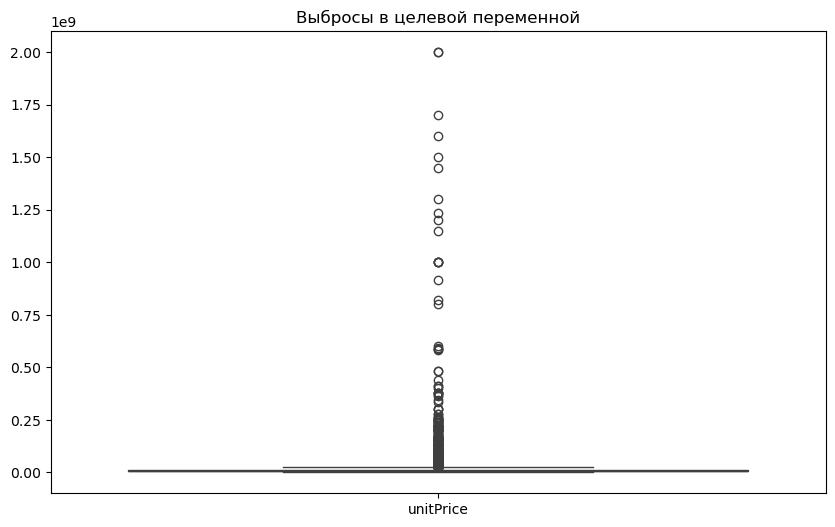

In [964]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_new[['unitPrice']])  # Подставь нужный столбец
plt.title('Выбросы в целевой переменной')
plt.show()


In [965]:
Q1 = df_new['unitPrice'].quantile(0.25)  
Q3 = df_new['unitPrice'].quantile(0.75)  
df_new = df_new[(df_new['unitPrice'] >= Q1) & (df_new['unitPrice'] <= Q3)]

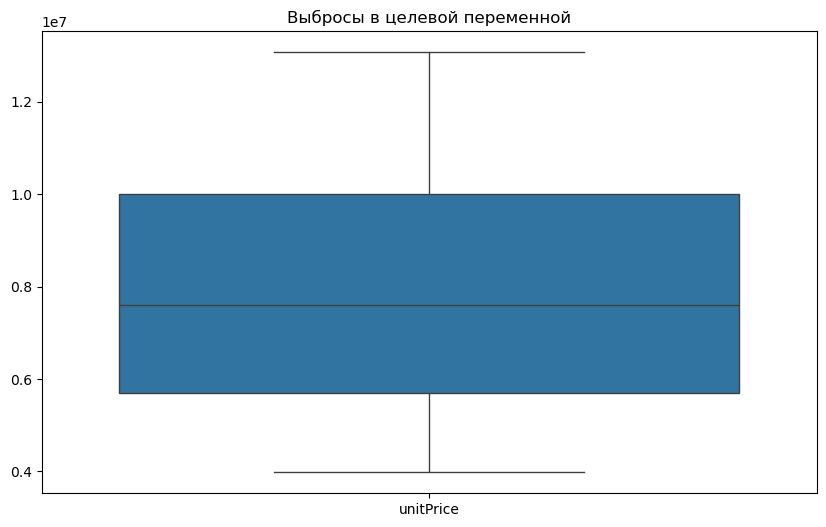

In [966]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_new[['unitPrice']])  # Подставь нужный столбец
plt.title('Выбросы в целевой переменной')
plt.show()


In [967]:
df_new.describe()

,isNewAuto,unitPrice,parameters_Коробка передач,parameters_Привод,parameters_Руль,parameters_Растаможен в Казахстане,year,mileage,Car_encoded,Body_encoded,engine_volume,fuel_type
count,6115.00000,6.115000e+03,6115.0,6115.000000,6115.000000,6115.000000,6115.0,6.115000e+03,6115.000000,6115.000000,6115.000000,6115.000000
mean,0.04399,7.932117e+06,1.036958,0.918888,0.489779,0.494522,2014.264759,1.508229e+05,430.308422,8.648406,2.353639,0.114800
std,0.20509,2.575755e+06,0.437012,0.396206,0.499936,0.500011,7.287389,9.562015e+04,220.299394,3.221312,0.677396,0.611392
min,0.00000,3.980000e+06,0.0,0.000000,0.000000,0.000000,1962.0,0.000000e+00,3.000000,0.000000,1.000000,0.000000
25%,0.00000,5.700000e+06,1.0,1.000000,0.000000,0.000000,2009.0,7.245131e+04,238.000000,10.000000,2.000000,0.000000
50%,0.00000,7.600000e+06,1.0,1.000000,0.000000,0.000000,2015.0,1.600000e+05,392.000000,10.000000,2.500000,0.000000
75%,0.00000,1.000000e+07,1.0,1.000000,1.000000,1.000000,2021.0,2.183535e+05,656.000000,10.000000,2.500000,0.000000
max,1.00000,1.307000e+07,3.0,2.000000,1.000000,1.000000,2025.0,1.250665e+06,778.000000,14.000000,6.000000,5.000000


In [968]:
df_new.to_csv('clean_dataset.csv')

In [969]:
# df_new = pd.get_dummies(df_new, columns=['attributes_model', 'attributes_brand', 'parameters_Кузов'], dtype=int)
df_new.drop(columns=['attributes_model','attributes_brand'], axis=1, inplace=True)

In [970]:
y = df_new['unitPrice']  
X = df_new.drop(columns=['unitPrice'])  

In [971]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [972]:
df_new.head()

,isNewAuto,unitPrice,parameters_Коробка передач,parameters_Привод,parameters_Руль,parameters_Растаможен в Казахстане,year,mileage,Car_encoded,Body_encoded,engine_volume,fuel_type
0,0,8500000.0,1,2,1,1,2008,229052.941176,508,10,5.5,0
2,0,5050000.0,1,1,1,1,2022,74564.000000,135,14,1.0,0
8,0,7300000.0,1,1,1,1,2004,230000.000000,647,7,2.5,0
20,0,11340000.0,2,1,1,1,2016,224180.000000,695,2,2.0,0
26,0,9060000.0,1,1,1,1,2021,107279.000000,231,10,1.5,0


In [973]:
df_new.columns

Index(['isNewAuto', 'unitPrice', 'parameters_Коробка передач',
       'parameters_Привод', 'parameters_Руль',
       'parameters_Растаможен в Казахстане', 'year', 'mileage', 'Car_encoded',
       'Body_encoded', 'engine_volume', 'fuel_type'],
      dtype='object')

In [974]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [975]:
y_pred = model.predict(X_test)

In [976]:
print(f'MAE: {mean_absolute_error(y_test, y_pred):.2f}')
print(f'MSE: {mean_squared_error(y_test, y_pred):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')
print(f'R²: {r2_score(y_test, y_pred):.2f}')

MAE: 1733188.93
MSE: 4615648960762.62
RMSE: 2148406.14
R²: 0.32


In [977]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAPE: {mape:.2f}%")


MAPE: 23.72%


In [978]:
df_new.columns

Index(['isNewAuto', 'unitPrice', 'parameters_Коробка передач',
       'parameters_Привод', 'parameters_Руль',
       'parameters_Растаможен в Казахстане', 'year', 'mileage', 'Car_encoded',
       'Body_encoded', 'engine_volume', 'fuel_type'],
      dtype='object')

In [979]:
import pickle

# Сохранение модели
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

# Сохранение LabelEncoder
with open("encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)

print("Модель и LabelEncoder сохранены!")


Модель и LabelEncoder сохранены!


In [980]:
#Седан           8927
# Кроссовер       1370
# Внедорожник      780
# Хэтчбек          348
# Минивэн          268
# Универсал        252
# Лифтбек          132
# Пикап            128
# Фургон            54
# Купе              34
# Микроавтобус      17
# Микровэн           2
# Кабриолет          2
# Родстер            2
# Тарга              1
# Фастбек            1

In [981]:
label_mapping_body = pd.DataFrame({
    "Car_encoded": range(len(encoder.classes_)),  # Индексы
    "Original_name": encoder.classes_  # Исходные названия
})

print(label_mapping_body)  # Таблица соответстви

    Car_encoded Original_name
0             0   Внедорожник
1             1     Кабриолет
2             2     Кроссовер
3             3          Купе
4             4       Лифтбек
5             5  Микроавтобус
6             6      Микровэн
7             7       Минивэн
8             8         Пикап
9             9       Родстер
10           10         Седан
11           11         Тарга
12           12     Универсал
13           13        Фургон
14           14       Хэтчбек


In [982]:
label_mapping_name = pd.DataFrame({
    "Car_encoded": range(len(encodera.classes_)),  
    "Original_name": encodera.classes_  
})

print(label_mapping_name)  

     Car_encoded Original_name
0              0       AITO M9
1              1      Audi 100
2              2       Audi 80
3              3       Audi A3
4              4       Audi A4
..           ...           ...
775          775    УАЗ Hunter
776          776   УАЗ Patriot
777          777    УАЗ Pickup
778          778   УАЗ Буханка
779          779    УАЗ Фермер

[780 rows x 2 columns]


In [983]:
df_label = label_mapping_name

In [984]:
df_label.to_csv("label_mapping_name.csv")

In [985]:
df_label

,Car_encoded,Original_name
0,0,AITO M9
1,1,Audi 100
2,2,Audi 80
3,3,Audi A3
4,4,Audi A4
...,...,...
775,775,УАЗ Hunter
776,776,УАЗ Patriot
777,777,УАЗ Pickup
778,778,УАЗ Буханка


In [986]:
df_label_body = label_mapping_body 
df_label_body.to_csv('label_mapping_body.csv')

In [987]:
print(label_mapping_name.head())  # Выведет первые строки таблицы



   Car_encoded Original_name
0            0       AITO M9
1            1      Audi 100
2            2       Audi 80
3            3       Audi A3
4            4       Audi A4


In [988]:
print(df_label_body)

    Car_encoded Original_name
0             0   Внедорожник
1             1     Кабриолет
2             2     Кроссовер
3             3          Купе
4             4       Лифтбек
5             5  Микроавтобус
6             6      Микровэн
7             7       Минивэн
8             8         Пикап
9             9       Родстер
10           10         Седан
11           11         Тарга
12           12     Универсал
13           13        Фургон
14           14       Хэтчбек


In [989]:
print(df_label)

     Car_encoded Original_name
0              0       AITO M9
1              1      Audi 100
2              2       Audi 80
3              3       Audi A3
4              4       Audi A4
..           ...           ...
775          775    УАЗ Hunter
776          776   УАЗ Patriot
777          777    УАЗ Pickup
778          778   УАЗ Буханка
779          779    УАЗ Фермер

[780 rows x 2 columns]
